# Introduction

The National Longitudinal Survey of Youth 1997-2011 dataset is one of the most important databases available to social scientists working with US data. 

It allows scientists to look at the determinants of earnings as well as educational attainment and has incredible relevance for government policy. It can also shed light on politically sensitive issues like how different educational attainment and salaries are for people of different ethnicity, sex, and other factors. When we have a better understanding how these variables affect education and earnings we can also formulate more suitable government policies. 

<center><img src=https://i.imgur.com/cxBpQ3I.png height=400></center>


### Upgrade Plotly

In [ ]:
%pip install --upgrade plotly

     |████████████████████████████████| 25.3 MB 68.9 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


###  Import Statements


In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

# Load the Data



In [3]:
df_data = pd.read_csv('/content/gdrive/MyDrive/100data/NLSY97_subset.csv')

### Understand the Dataset

Have a look at the file entitled `NLSY97_Variable_Names_and_Descriptions.csv`. 

---------------------------

    :Key Variables:  
      1. S           Years of schooling (highest grade completed as of 2011)
      2. EXP         Total out-of-school work experience (years) as of the 2011 interview.
      3. EARNINGS    Current hourly earnings in $ reported at the 2011 interview

# Preliminary Data Exploration 🔎

**Challenge**

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
df_data.shape

(2000, 96)

In [ ]:
df_data.columns

Index(['ID', 'EARNINGS', 'S', 'EXP', 'FEMALE', 'MALE', 'BYEAR', 'AGE',
       'AGEMBTH', 'HHINC97', 'POVRAT97', 'HHBMBF', 'HHBMOF', 'HHOMBF',
       'HHBMONLY', 'HHBFONLY', 'HHOTHER', 'MSA97NO', 'MSA97NCC', 'MSA97CC',
       'MSA97NK', 'ETHBLACK', 'ETHHISP', 'ETHWHITE', 'EDUCPROF', 'EDUCPHD',
       'EDUCMAST', 'EDUCBA', 'EDUCAA', 'EDUCHSD', 'EDUCGED', 'EDUCDO',
       'PRMONM', 'PRMONF', 'PRMSTYUN', 'PRMSTYPE', 'PRMSTYAN', 'PRMSTYAE',
       'PRFSTYUN', 'PRFSTYPE', 'PRFSTYAN', 'PRFSTYAE', 'SINGLE', 'MARRIED',
       'COHABIT', 'OTHSING', 'FAITHN', 'FAITHP', 'FAITHC', 'FAITHJ', 'FAITHO',
       'FAITHM', 'ASVABAR', 'ASVABWK', 'ASVABPC', 'ASVABMK', 'ASVABNO',
       'ASVABCS', 'ASVABC', 'ASVABC4', 'VERBAL', 'ASVABMV', 'HEIGHT',
       'WEIGHT04', 'WEIGHT11', 'SF', 'SM', 'SFR', 'SMR', 'SIBLINGS', 'REG97NE',
       'REG97NC', 'REG97S', 'REG97W', 'RS97RURL', 'RS97URBN', 'RS97UNKN',
       'JOBS', 'HOURS', 'TENURE', 'CATGOV', 'CATPRI', 'CATNPO', 'CATMIS',
       'CATSE', 'COLLBARG', 'URBAN'

In [4]:
df_data.isna().values.any()

True

In [5]:
df_data.duplicated().values.any()

True

## Data Cleaning - Check for Missing Values and Duplicates

Find and remove any duplicate rows.

In [6]:
df_data.dropna(inplace=True)
df_data.isna().values.any()

False

In [8]:
df_data.drop_duplicates(inplace=True)
df_data.duplicated().values.any()

False

## Descriptive Statistics

In [9]:
df_data.describe()

,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,POVRAT97,HHBMBF,HHBMOF,HHOMBF,HHBMONLY,HHBFONLY,HHOTHER,MSA97NO,MSA97NCC,MSA97CC,MSA97NK,ETHBLACK,ETHHISP,ETHWHITE,EDUCPROF,EDUCPHD,EDUCMAST,EDUCBA,EDUCAA,EDUCHSD,EDUCGED,EDUCDO,PRMONM,PRMONF,PRMSTYUN,PRMSTYPE,PRMSTYAN,PRMSTYAE,PRFSTYUN,PRFSTYPE,...,ASVABNO,ASVABCS,ASVABC,ASVABC4,VERBAL,ASVABMV,HEIGHT,WEIGHT04,WEIGHT11,SF,SM,SFR,SMR,SIBLINGS,REG97NE,REG97NC,REG97S,REG97W,RS97RURL,RS97URBN,RS97UNKN,JOBS,HOURS,TENURE,CATGOV,CATPRI,CATNPO,CATMIS,CATSE,COLLBARG,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
count,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,...,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00
mean,"3,530.57",19.13,14.89,5.92,0.49,0.51,"1,982.98",28.02,26.74,"66,732.78",403.47,0.89,0.09,0.02,0.00,0.00,0.00,0.21,0.55,0.23,0.00,0.07,0.10,0.83,0.02,0.00,0.09,0.36,0.08,0.37,0.06,0.03,10.05,7.56,0.14,0.38,0.14,0.34,0.15,0.33,...,0.17,0.24,0.32,0.32,0.28,"60,033.84",68.03,164.29,177.98,13.71,13.59,13.84,13.57,1.96,0.15,0.36,0.29,0.19,0.32,0.68,0.00,5.32,39.87,3.37,0.13,0.74,0.08,0.05,0.06,0.12,0.75,0.13,0.31,0.35,0.21,0.05,0.54,0.41,0.00,0.00
std,"1,948.08",11.54,2.69,2.51,0.50,0.50,0.82,0.82,4.71,"44,951.87",306.14,0.32,0.29,0.14,0.00,0.00,0.05,0.41,0.50,0.42,0.00,0.26,0.29,0.37,0.13,0.05,0.29,0.48,0.27,0.48,0.23,0.17,2.95,3.61,0.35,0.49,0.35,0.47,0.36,0.47,...,0.93,0.90,0.87,0.86,0.88,"26,528.00",4.16,39.41,46.16,2.92,2.55,2.89,2.55,1.44,0.36,0.48,0.45,0.40,0.47,0.47,0.00,2.82,10.49,2.30,0.34,0.44,0.27,0.22,0.24,0.33,0.44,0.33,0.46,0.48,0.41,0.22,0.50,0.49,0.05,0.00
min,28.00,2.13,8.00,0.00,0.00,0.00,"1,982.00",27.00,17.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,-3.87,-3.77,-2.43,-2.31,-2.31,281.00,59.00,96.00,95.00,4.00,4.00,4.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,10.00,0.13,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"1,833.25",12.00,12.00,4.24,0.00,0.00,"1,982.00",27.00,24.00,"40,725.00",223.75,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,...,-0.41,-0.38,-0.17,-0.18,-0.32,"41,179.50",64.00,135.00,141.50,12.00,12.00,12.00,12.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,40.00,1.27,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,"3,470.50",16.00,16.00,5.75,0.00,1.00,"1,983.00",28.00,26.00,"58,027.50",333.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.00,8.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.21,0.26,0.36,0.39,0.35,"63,057.00",68.00,158.00,170.00,13.00,13.00,14.00,13.00,2.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,5.00,40.00,3.15,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
75%,"5,186.75",24.04,17.00,7.75,1.00,1.00,"1,984.00",29.00,30.00,"77,432.50",468.50,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,12.00,10.00,0.00,1.00,0.00,1.00,0.00,1.00,...,0.79,0.84,0.96,0.95,0.93,"82,943.00",71.00,185.00,200.00,16.00,16.00,16.00,16.00,3.00,0.00,1.00,1.00,0.00,1.00,1.00,0.00,7.00,42.00,4.99,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00
max,"8,978.00",123.08,20.00,12.33,1.00,1.00,"1,984.00",29.00,41.00,"246,474.00","1,627.00",1.00,1.00,1.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.0

In [10]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 492 entries, 0 to 1989
Data columns (total 96 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        492 non-null    int64  
 1   EARNINGS  492 non-null    float64
 2   S         492 non-null    int64  
 3   EXP       492 non-null    float64
 4   FEMALE    492 non-null    int64  
 5   MALE      492 non-null    int64  
 6   BYEAR     492 non-null    int64  
 7   AGE       492 non-null    int64  
 8   AGEMBTH   492 non-null    float64
 9   HHINC97   492 non-null    float64
 10  POVRAT97  492 non-null    float64
 11  HHBMBF    492 non-null    int64  
 12  HHBMOF    492 non-null    int64  
 13  HHOMBF    492 non-null    int64  
 14  HHBMONLY  492 non-null    int64  
 15  HHBFONLY  492 non-null    int64  
 16  HHOTHER   492 non-null    int64  
 17  MSA97NO   492 non-null    int64  
 18  MSA97NCC  492 non-null    int64  
 19  MSA97CC   492 non-null    int64  
 20  MSA97NK   492 non-null    int64

In [19]:
df_data.tail(5)

,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,POVRAT97,HHBMBF,HHBMOF,HHOMBF,HHBMONLY,HHBFONLY,HHOTHER,MSA97NO,MSA97NCC,MSA97CC,MSA97NK,ETHBLACK,ETHHISP,ETHWHITE,EDUCPROF,EDUCPHD,EDUCMAST,EDUCBA,EDUCAA,EDUCHSD,EDUCGED,EDUCDO,PRMONM,PRMONF,PRMSTYUN,PRMSTYPE,PRMSTYAN,PRMSTYAE,PRFSTYUN,PRFSTYPE,...,ASVABNO,ASVABCS,ASVABC,ASVABC4,VERBAL,ASVABMV,HEIGHT,WEIGHT04,WEIGHT11,SF,SM,SFR,SMR,SIBLINGS,REG97NE,REG97NC,REG97S,REG97W,RS97RURL,RS97URBN,RS97UNKN,JOBS,HOURS,TENURE,CATGOV,CATPRI,CATNPO,CATMIS,CATSE,COLLBARG,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
1961,916,28.85,16,3.23,1,0,1983,28,35.00,"95,000.00",597.00,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,8.00,4.00,0.00,1.00,0.00,0.00,0.00,0.00,...,-0.33,1.13,0.32,0.68,0.61,70288,64,105,105,16,14,16.00,14.00,3,0,0,0,1,0,1,0,6.00,40,0.27,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0
1964,5530,2.33,12,7.87,1,0,1984,27,20.00,"21,010.00",112.00,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,8.00,7.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.30,0.49,0.11,0.08,0.11,41160,62,140,215,14,10,14.00,10.00,2,0,1,0,0,1,0,0,1.00,20,7.25,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0
1982,3897,10.00,14,8.77,1,0,1982,29,26.00,"25,110.00",158.00,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,14.00,8.00,0.00,0.00,0.00,1.00,0.00,0.00,...,-0.25,0.87,0.36,0.69,0.88,79235,64,133,184,12,12,12.00,12.00,1,0,0,1,0,1,0,0,1.00,60,8.98,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1984,2400,9.00,12,10.83,1,0,1982,29,29.00,"73,100.00",390.00,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,11.00,4.00,0.00,0.00,0.00,1.00,0.00,0.00,...,0.20,-0.53,-0.83,-0.81,-1.09,22110,69,190,100,16,12,16.00,12.00,5,1,0,0,0,1,0,0,14.00,30,2.15,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1989,3018,8.00,12,9.37,1,0,1982,29,23.00,"66,300.00",354.00,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,16.00,10.00,0.00,1.00,0.00,0.00,0.00,1.00,...,-1.81,-1.15,-1.95,-1.78,-1.35,7706,67,125,160,13,14,13.00,14.00,2,0,1,0,0,1,0,0,3.00,28,1.46,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0


## Visualise the Features

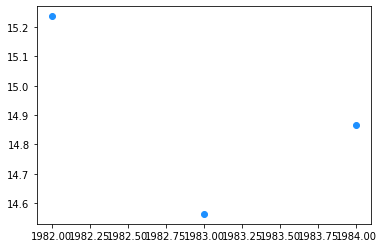

In [37]:
df_data_sorted = df_data.groupby('BYEAR', as_index=False).mean()
plt.scatter(x=df_data_sorted.BYEAR, y=df_data_sorted.S, c='dodgerblue' )

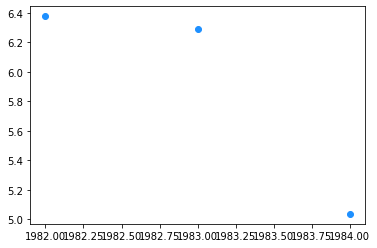

In [38]:
plt.scatter(x=df_data_sorted.BYEAR, y=df_data_sorted.EXP, c='dodgerblue' )

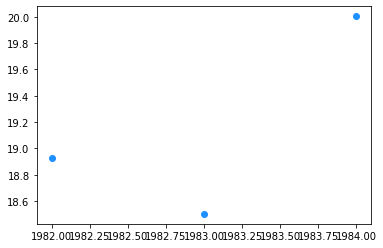

In [39]:
plt.scatter(x=df_data_sorted.BYEAR, y=df_data_sorted.EARNINGS, c='dodgerblue' )

# Split Training & Test Dataset

We *can't* use all the entries in our dataset to train our model. Keep 20% of the data for later as a testing dataset (out-of-sample data).  

In [40]:
target = df_data['EARNINGS']
features = df_data.drop('EARNINGS', axis=1)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=10)

# Simple Linear Regression

Only use the years of schooling to predict earnings. Use sklearn to run the regression on the training dataset. How high is the r-squared for the regression on the training data? 

In [53]:
features

,ID,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,POVRAT97,HHBMBF,HHBMOF,HHOMBF,HHBMONLY,HHBFONLY,HHOTHER,MSA97NO,MSA97NCC,MSA97CC,MSA97NK,ETHBLACK,ETHHISP,ETHWHITE,EDUCPROF,EDUCPHD,EDUCMAST,EDUCBA,EDUCAA,EDUCHSD,EDUCGED,EDUCDO,PRMONM,PRMONF,PRMSTYUN,PRMSTYPE,PRMSTYAN,PRMSTYAE,PRFSTYUN,PRFSTYPE,PRFSTYAN,...,ASVABNO,ASVABCS,ASVABC,ASVABC4,VERBAL,ASVABMV,HEIGHT,WEIGHT04,WEIGHT11,SF,SM,SFR,SMR,SIBLINGS,REG97NE,REG97NC,REG97S,REG97W,RS97RURL,RS97URBN,RS97UNKN,JOBS,HOURS,TENURE,CATGOV,CATPRI,CATNPO,CATMIS,CATSE,COLLBARG,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
0,4275,12,9.71,0,1,1984,27,24.00,"64,000.00",402.00,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,14.00,14.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,-0.36,-0.72,-0.21,-0.32,-0.53,29818,70,155,186,12,12,12.00,12.00,1,0,0,1,0,0,1,0,6.00,50,4.77,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0
4,1994,15,2.94,0,1,1984,27,23.00,"44,188.00",278.00,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,11.00,8.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,...,0.22,0.22,1.15,1.07,0.59,89773,71,145,170,14,16,14.00,16.00,1,0,0,0,1,0,1,0,7.00,40,2.35,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0
5,2788,12,8.02,0,1,1983,28,25.00,"97,400.00",612.00,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,5.00,3.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,...,-0.76,0.69,0.90,1.02,0.97,86885,66,220,245,13,13,13.00,13.00,1,0,1,0,0,1,0,0,2.00,50,4.25,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0
6,3473,13,9.79,0,1,1983,28,23.00,"70,751.00",445.00,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,3.00,5.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,...,-1.31,-0.01,-2.05,-1.62,-1.22,8396,69,154,150,12,16,12.00,16.00,1,0,0,1,0,0,1,0,3.00,30,8.08,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0
8,1239,14,6.85,0,1,1983,28,25.00,"246,474.00","1,627.00",1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,10.00,6.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,...,0.87,0.56,2.10,1.93,2.10,98479,71,175,180,16,20,16.00,20.00,1,0,1,0,0,0,1,0,6.00,40,3.88,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1961,916,16,3.23,1,0,1983,28,35.00,"95,000.00",597.00,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,8.00,4.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,-0.33,1.13,0.32,0.68,0.61,70288,64,105,105,16,14,16.00,14.00,3,0,0,0,1,0,1,0,6.00,40,0.27,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0
1964,5530,12,7.87,1,0,1984,27,20.00,"21,010.00",112.00,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,8.00,7.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.30,0.49,0.11,0.08,0.11,41160,62,140,215,14,10,14.00,10.00,2,0,1,0,0,1,0,0,1.00,20,7.25,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0
1982,3897,14,8.77,1,0,1982,29,26.00,"25,110.00",158.00,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,14.00,8.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,-0.25,0.87,0.36,0.69,0.88,79235,64,133,184,12,12,12.00,12.00,1,0,0,1,0,1,0,0,1.00,60,8.98,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1984,2400,12,10.83,1,0,1982,29,29.00,"73,100.00",390.00,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,11.00,4.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,...,0.20,-0.53,-0.83,-0.81,-1.09,22110,69,190,100,16,12,16.00,12.00,5,1,0,0,0,1,0,0,14.00,30,2.15,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [55]:
regr = LinearRegression()
regr.fit(pd.DataFrame(X_train['BYEAR']), y_train)
rsquared = regr.score(pd.DataFrame(X_train['BYEAR']), y_train)
rsquared

0.002416776225785955

### Evaluate the Coefficients of the Model

Here we do a sense check on our regression coefficients. The first thing to look for is if the coefficients have the expected sign (positive or negative). 

Interpret the regression. How many extra dollars can one expect to earn for an additional year of schooling?

### Analyse the Estimated Values & Regression Residuals

How good our regression is also depends on the residuals - the difference between the model's predictions ( 𝑦̂ 𝑖 ) and the true values ( 𝑦𝑖 ) inside y_train. Do you see any patterns in the distribution of the residuals?

# Multivariable Regression

Now use both years of schooling and the years work experience to predict earnings. How high is the r-squared for the regression on the training data? 

### Evaluate the Coefficients of the Model

### Analyse the Estimated Values & Regression Residuals

# Use Your Model to Make a Prediction

How much can someone with a bachelors degree (12 + 4) years of schooling and 5 years work experience expect to earn in 2011?

# Experiment and Investigate Further

Which other features could you consider adding to further improve the regression to better predict earnings? 